## Neke funkcije i klase koristene
- pd.read_csv('...')
- train_test_split
- StandardScaler
- LinearRegression
- np.ones
- np.min / max
- np.array
- np.linspace
- np.scatter
- np.plot
- make_blobs
- SVC
- LinearSVC
- LogisticRegression
- confusion_matrix
- PolynomialFeatures
- mean_squared_error
- accuracy_score


# LINEARNA REGRESIJA

## Lin regresija vise var.

**Model funkcija** 
$h_{\theta} : \mathbb{R}^n \to \mathbb{R}$
$$
h_{\theta}(x) = \theta_0 + \theta_1x + ... + \theta_nx_n
$$
koja najblize opisuje skup podataka $S = \{(x^{(i)}, y^{(i)}): i = 1...m\}$, gdje je **m** broj podataka, a **n** broj svojstava

**Kriterijska funkcija** koju je potrebno minimizirati:
$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))^2 \to min
$$
- J je diferencijabilna i konveksna te se rješenje dobije **Gradijentnom metodom**
- uvodimo **feature scaling**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.datasets import load_wine 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import seaborn as sns

# PRIPREMA PODATAKA 
# ucitavanje podataka 
df = pd.read_csv('./Vježbe 01/Podaci/winequality-white.csv')
X = df["alcohol"]
y = df["density"]

# train_test_split funkcija
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# algoritmu ucenja dajemo podatke spremljene u numpy array
X_train = X_train.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)
#print(X_train)
#print(X_train.squeeze())

# feature scaling podataka
scaler = preprocessing.StandardScaler()
scaler.fit(X_train, y_train)

X_train = scaler.transform(X_train)
X_test = scaler.fit_transform(X_test)   # samo transofrm?


Model linearne regresije je implementiran kao klasa. Prilikom instanciranja možemo postaviti sljedeće parametre:
- fit_intercept
    - bool
    - zadano je True
    - određuje treba li računati pomak ili ne
- normalize:
    - bool
    - zadano je False
    - ako je fit_intercept False, ovaj parametar se ignorira
    - ako je True, podaci su normalizirani tako da se oduzme aritmetička sredina i podijeli sa L2 normom
    
Nakon što smo postavili model imamo dostupne sljedeće metode
- fit(X, y) treniramo model
- predict(X) vraća predikciju za neki podatak na temelju natreniranih težina
- score(X,y) računa predikcije i uspoređuje sa stvarnim vrijednostima te vraća koeficijent (više na https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)  

I atribute:
- coef_
- intercept_ 

[2.70219778e-06]


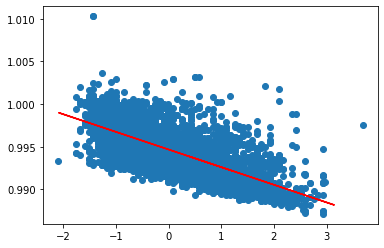

In [20]:
# TRENIRANJE PODATAKA
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

# kriterijska funkcija
loss = 0
for i, prediction in enumerate(lr.predict(X_test)):
    loss += (prediction - y_test[i])**2
print(loss / (2 * X_test.shape[0]))

lr.score(X_test,y_test)

y_pred = lr.predict(X_test)

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, c='r')


## Polinomna regresija

Umjesto definiranja kubične model funkcije
$$
h_{\textrm{cubic}}(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3,
$$
definiramo linearnu model funkciju 
$$
h_{\textrm{linear}}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3,
$$
gdje je $x_1 = x$, $x_2 = x^2$, $x_3 = x^3$.

U modelu polinomijalne regresije stupnja $n$, matrica dizajna je oblika
$$
\begin{bmatrix}
1 & x^{(1)} & x^{(1)^2} & \dots & x^{(1)^n} \\
1 & x^{(2)} & x^{(2)^2} & \dots & x^{(2)^n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x^{(m)} & x^{(m)^2} & \dots & x^{(m)^n}
\end{bmatrix},
$$

In [23]:
def cubic_regression_transform(X):
    """X je numpy.array oblika (m,)
    """
    m = X.shape[0]
    X_transformed = np.empty((m, 3))
    X_transformed[:, 0] = X
    X_transformed[:, 1] = np.power(X, 2)
    X_transformed[:, 2] = np.power(X, 3)
    return X_transformed

# matrica dizajna
#X_new = np.ones((X.shape[0],6))
#for i in range(1, 6):
#    X_new[:,i] = X ** i

data_path = './Vježbe 02/poly_data.csv'
df = pd.read_csv(data_path)

X = df['x']
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_transformed = cubic_regression_transform(X_train.to_numpy())
X_test_transformed = cubic_regression_transform(X_test.to_numpy())
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

# Skaliranje podataka
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_transformed)
X_train_transformed = scaler.transform(X_train_transformed)
X_test_transformed = scaler.transform(X_test_transformed)


# PERCEPTRON - LINEARNI KLASIFIKATOR

 - Zadani su podaci $\{x^{(1)}, x^{(2)}, \dots, x^{(m)}\} \subset \mathbb{R}^{n}$ i pripadne oznake/klase $y_i \in \{-1, 1\}$. 
 - **Model funkcija linearnog klasifikatora** 
$h_{\theta} : \mathbb{R}^n \to \mathbb{R}$
$$
h_{\theta}(x) = sign(\theta_0 + \theta_1x + ... + \theta_nx_n)
$$
 - Ideja perceptron algoritma je pronaći **hiperravninu** (potprostor dimenzije $n-1$) takav da se svi podaci s oznakom $1$ nalaze s jedne strane, a ostali s druge strane hiperravnine.
 - Hiperravnina je definirana vektorom $\Theta = [\theta_1, \dots, \theta_n]^T \in \mathbb{R}^n$ koji opisuje hiperravninu jednadžbom
 $$
 \Theta^Tx = \theta_1x_1 + \dots + \theta_nx_n = 0.
 $$
 - Ovako definirana hiperravnina očito prolazi kroz ishodište. Hiperravnina koja ne prolazi kroz ishodište ima dodatni *bias* parametar $\theta_0$ (kao i u modelu linearne regresije), a jednadžba postaje
 $$
 \theta_0 + \Theta^Tx = \theta_0 + \theta_1x_1 + \dots + \theta_nx_n = 0.
 $$
 - Za točke $x \in \mathbb{R}^n$ s oznakom 1 (s "gornje" strane hiperravnine) vrijedi $\theta_0 + \Theta^{T}x > 0$, dok je za ostale $\theta_0 + \Theta^{T}x < 0$.
 - Vektor $\Theta$ je vektor normale na dobivenu hiperravninu.
 - U slučaju kad su točke $x^{(i)} \in \mathbb{R}^2$, hiperravnina koju tražimo je **pravac** opisan jednadžbom
 $$
 \theta_0 + \theta_1x + \theta_2y = 0,
 $$
 odnosno
 $$
 y = -\frac{\theta_1}{\theta_2}x - \frac{\theta_0}{\theta_2},
 $$
 ako je $\theta_2 \neq 0$.

In [5]:
from sklearn.datasets import make_blobs
#plt.rcParams["figure.figsize"] = (10, 10) # velicina slike

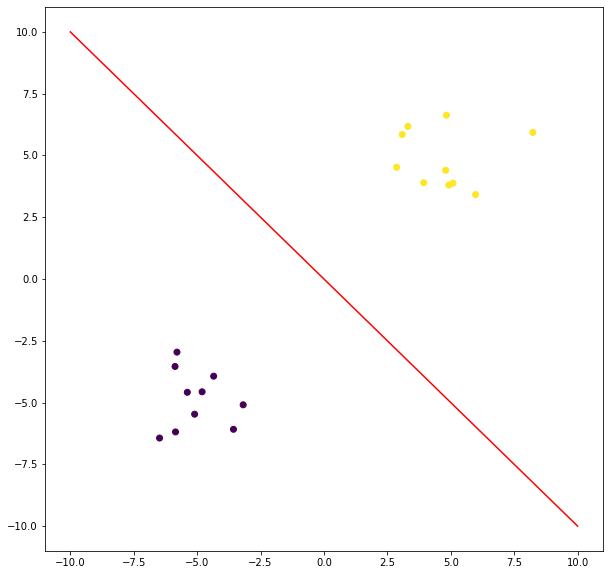

Točka: [-3.18520775 -5.09149799]
Predikcija: -1.0
Klasa: -1
Točka: [4.79983378 4.39728057]
Predikcija: 1.0
Klasa: 1
Točka: [-6.48160987 -6.43679023]
Predikcija: -1.0
Klasa: -1
Točka: [2.86502542 4.52379288]
Predikcija: 1.0
Klasa: 1
Točka: [5.97922972 3.41681709]
Predikcija: 1.0
Klasa: 1
Točka: [-5.09866207 -5.47113217]
Predikcija: -1.0
Klasa: -1
Točka: [8.23581073 5.93214673]
Predikcija: 1.0
Klasa: 1
Točka: [-3.56692251 -6.08249557]
Predikcija: -1.0
Klasa: -1
Točka: [4.92383418 3.80288952]
Predikcija: 1.0
Klasa: 1
Točka: [-5.87099418 -3.53947992]
Predikcija: -1.0
Klasa: -1
Točka: [5.08279761 3.87800297]
Predikcija: 1.0
Klasa: 1
Točka: [-5.79481671 -2.95967754]
Predikcija: -1.0
Klasa: -1
Točka: [-5.85211582 -6.18916564]
Predikcija: -1.0
Klasa: -1
Točka: [-5.3873097 -4.5849183]
Predikcija: -1.0
Klasa: -1
Točka: [-4.34779107 -3.93291961]
Predikcija: -1.0
Klasa: -1
Točka: [4.83021254 6.6281919 ]
Predikcija: 1.0
Klasa: 1
Točka: [-4.80422014 -4.56505614]
Predikcija: -1.0
Klasa: -1
Točka: [3.

In [52]:
X, y = make_blobs(n_samples=20, n_features=2, centers=[(-5,-5), (5,5)])
y[y==0] = -1 # y = [1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1], 0 pretvori u -1

plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-10,10)
yy = np.linspace(10,-10)
plt.plot(xx,yy,c='r')
plt.show()

def h(X, theta):
    return np.sign(np.dot(X, theta))

theta = np.array([1,1])
for i, x in enumerate(X):
    print(f'Točka: {x}\nPredikcija: {h(x,theta)}\nKlasa: {y[i]}')

## Perceptron klasa u scikit-learn

In [60]:
from sklearn.linear_model import Perceptron

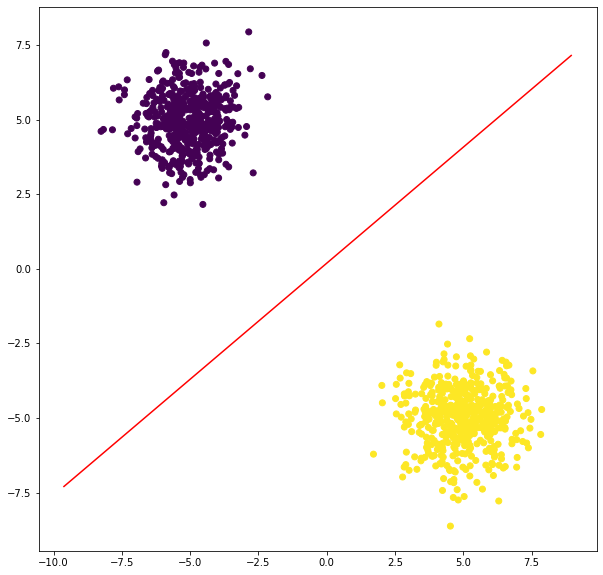

In [65]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[(-5,5), (5,-5)])
y[y==0] = -1
plt.scatter(X[:,0], X[:,1], c=y)

model = Perceptron(fit_intercept=True)  # ako su blobovi na putu od y=x mora postojati pomak (fit_intercept)
model.fit(X,y)
model.coef_, model.intercept_

xx = np.linspace(np.min(X)-1, np.max(X)+1)
yy = -(model.coef_[0][0]/model.coef_[0][1])*xx -(model.intercept_/model.coef_[0][1])
plt.plot(xx,yy,c='r')

# ista stvar ako podatci nisu separabilni, samo sto ce score biti manji - staviti fit_intercept=True

### Vjezbe 3-dio-1 Zadatak 4
Zadan je skup točaka $\{(-1, 1), (1, 1), (2, 1), (-1, -1), (1, -1)$ i redom pripadne klase $\{1, 1, -1, 1, -1\}$. Odredite dvije hiperravnine, jednu koja točno klasificira dane podatke i jednu koja radi netočnu klasifikaciju. Grafički prikažite skup točaka i obje hiperravnine. Točke iz različitih klasa trebaju imati različite boje.

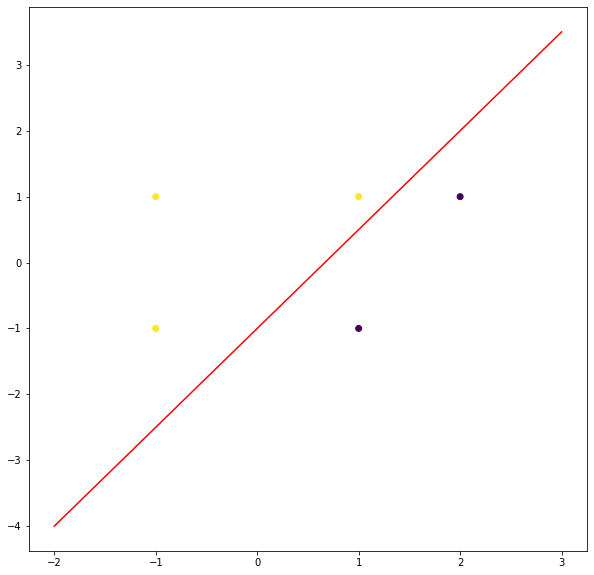

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron

X = np.array([(-1, 1), (1, 1), (2, 1), (-1, -1), (1, -1)])
y = np.array([1, 1, -1, 1, -1])

plt.scatter(X[:,0], X[:,1], c=y)

xx = np.linspace(np.min(X)-1, np.max(X)+1)

#model = Perceptron(fit_intercept=True)
#model.fit(X,y)
#model.coef_, model.intercept_

dobar_theta = [2, -3, 2]    # nasao ove koeficijente iz Perceptron algoritma
los_theta = [1, 2, 3]

#yy = -(model.coef_[0][0]/model.coef_[0][1])*xx -(model.intercept_[0]/model.coef_[0][1])
yy1 = -(dobar_theta[1]/dobar_theta[2])*xx -(dobar_theta[0]/dobar_theta[2])
yy2 = -(los_theta[1]/los_theta[2])*xx -(los_theta[0]/los_theta[2])

plt.plot(xx,yy1,c='r')
#plt.plot(xx,yy2,c='r')

# SVM - LINEARNI KLASIFIKATOR

- perceptron klasificira linearno separabilan skup podataka
- osim same klasifikacijske hiperravnine, želimo pronaći hiperravninu koja **maksimizira** geometrijsku marginu
- ako perceptron natreniramo na nekom skupu podataka, velika geometrijska margina nam "osigurava" da nove, neviđene točke budu točno klasificirane
- kako bismo pronašli takvu hiperravninu, moramo postaviti nekakav optimizacijski problem
- ako su podaci linearno separabilni hiperravninom kroz ishodište, onda postoje $\Theta \in \mathbb{R}^n$ i $\gamma > 0$ takvi da $y^{(i)}\Theta^T x^{(i)} \geq \gamma, \text{ } i = 1, 2, \dots, m$
- optimizacijski problem možemo postaviti kao
$$
\textrm{argmax}_{\gamma, \Theta}\frac{\gamma}{||\Theta||}
$$

$$
\text{  uz uvjet  } y^{(i)}\Theta^T x^{(i)} \geq \gamma, \text{ }  i = 1, 2, \dots, m,
$$
što se može svesti na 
$$
\textrm{argmin}_{\gamma, \Theta}\frac{1}{2}\left(\frac{||\Theta||}{\gamma}\right)^2
$$

$$
\text{  uz uvjet  } y^{(i)}\Theta^T x^{(i)} \geq \gamma, \text{ }  i = 1, 2, \dots, m,
$$
odnosno
$$
\textrm{argmin}_{\Theta}\frac{1}{2}||\Theta||^2
$$

$$
\text{  uz uvjet  } y^{(i)}\Theta^T x^{(i)} \geq 1, \text{ }  i = 1, 2, \dots, m,
$$

- problem se može generalizirati na hiperravninu koja ne prolazi ishodištem
$$
\textrm{argmin}_{\Theta, \theta_0}\frac{1}{2}||\Theta||^2
$$

$$
\text{  uz uvjet  } y^{(i)}(\Theta^T x^{(i)} + \theta_0) \geq 1, \text{ }  i = 1, 2, \dots, m,
$$

- ako podaci **nisu linearno separabilni**, dozvoljavamo kršenje uvjeta, ali uz penalizaciju koju je potrebno minimizirati
$$
\textrm{argmin}_{\Theta, \theta_0, \xi_i}\frac{1}{2}||\Theta||^2 + C\sum\limits_{i=1}^m \xi_i
$$

$$
\text{  uz uvjet  } y^{(i)}(\Theta^T x^{(i)} + \theta_0) \geq 1 - \xi_i \textrm{ i } \xi_i \geq 0, \text{ }  i = 1, 2, \dots, m,
$$

## SVM klasa u scikit-learn
Dostupne su implementacije nekoliko algoritama: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVC) i [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC).

Implementacije se razlikuju po algoritmima koje koriste. SVC koristi libsvm, dok LinearSVC koristi liblinear te je puno efikasniji.

Možemo dodatno proslijediti **kernel** koji transformira točke u višu dimenziju, ali o tome na nekim kasnijim vježbama.

SVC je sporiji od LinearSVC, ali LinearSVC ne računa support vektore

In [90]:
from sklearn.svm import SVC

[[-1.    0.75]] [1.53125]
0.8
[[4.   2.25]
 [3.   3.  ]]


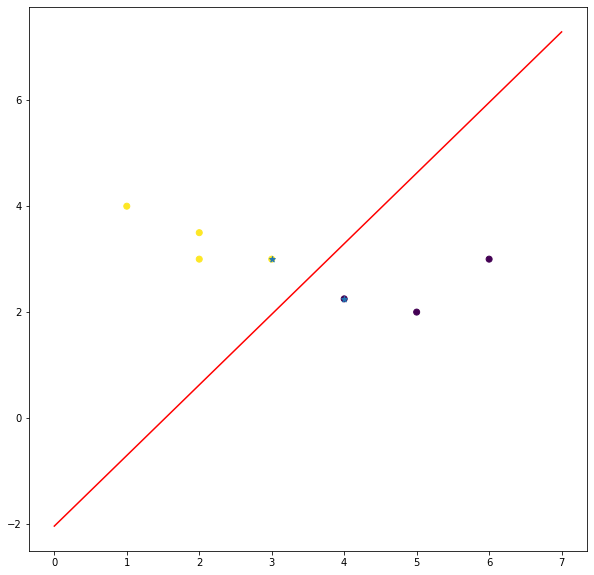

In [100]:
X = np.array([[2,3.5], [2,3], [1,4], [3,3], [5,2], [4,2.25], [6,3]])
y = np.array([1, 1, 1, 1, -1, -1, -1])

plt.scatter(X[:,0], X[:,1], c=y)

clf = SVC(kernel='linear')
clf.fit(X,y)

print(clf.coef_, clf.intercept_)
print(1 / np.linalg.norm(clf.coef_))    # GEOMETRIJSKA MARGINA

xx = np.linspace(np.min(X)-1, np.max(X)+1)
yy = -(clf.coef_[0][0]/clf.coef_[0][1])*xx -(clf.intercept_[0]/clf.coef_[0][1])
plt.plot(xx,yy, c='r')

print(clf.support_vectors_) # Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='*')


- Ručno određivanje support vectora u LinearSVC sam preskočio
- Potporni vektori su oni za koje vrijedi
$$
\Theta^Tx + \theta_0 \leq 1.
$$

### Vjezbe 4-dio-1 Zadatak 5
Učitajte podatke iz prošle zadaće (*A.csv*).

1. Konstruirajte SVM model primjenom *LinearSVC* klase iz *sklearn.svm*.

2. Ispišite parametre $\theta_0$ i $\Theta$.

3. Izračunajte i ispišite potporne vektore.

4. Izračunajte geometrijsku marginu.

5. Grafički prikažite podatke, dobivenu hiperravninu koja razdvaja podatke, te potporne vektore.

[-0.40368282]
[[-0.16160019  0.1615812 ]]
[[13.07287283  9.3862776 ]
 [ 7.66758227  3.97609536]
 [15.76276173 12.07636037]
 [ 7.55536057 16.24252895]
 [11.41787863 20.10450994]]
4.375912645121332


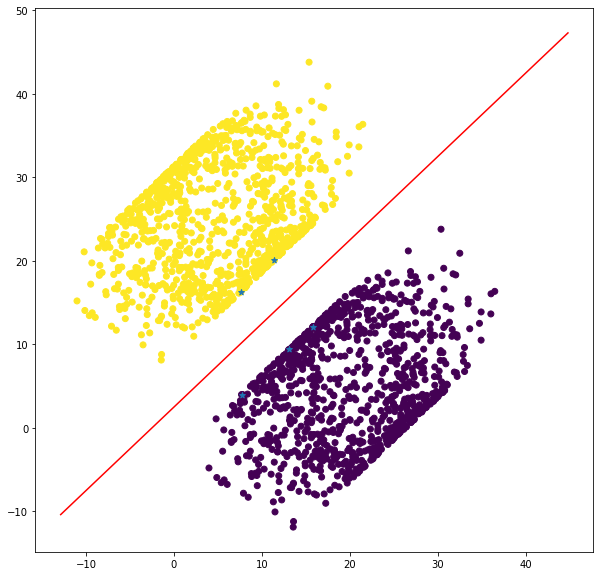

In [132]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC

df = pd.read_csv('./Vježbe 03/Podaci/A.csv')

X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

# računanje support vektora
#dec_func = clf_a.decision_function(X_a)
#support_vector_indices = np.where(np.abs(dec_func) <= 1 + 1e-15)
#support_vectors = X_a[support_vector_indices]

# neću izračunati potporne vektore nego cu koristiti SVC
model = SVC(kernel='linear')
model.fit(X,y)

print(model.intercept_)
print(model.coef_)
print(model.support_vectors_)
print(1 / np.linalg.norm(model.coef_)) # 1/||theta||

xx = np.linspace(np.min(X)-1, np.max(X)+1)
yy = -(model.coef_[0][0]/model.coef_[0][1])*xx -(model.intercept_[0]/model.coef_[0][1])

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], marker='*')
plt.plot(xx,yy, c='r')


# LOGISTIČKA REGRESIJA - problem klasifikacije


- za model funkciju koristimo logističku (sigmoidnu) funkciju $\sigma : \mathbb{R} \to \mathbb{R}$, zadanu s $\sigma(x) = \frac{1}{1+\exp{(-x)}}$
- model funkcija $ h_\Theta: \mathbb{R}^n \to \langle 0,1 \rangle$ definira vjerojatnosnu distribuciju nad training podatcima (vjerojatnost da je podatak x klasificiran kao 1) 
$$
h_{\Theta}(x) = \sigma(\Theta^Tx) = \frac{1}{1+\exp{(-\Theta^Tx)}}
$$ 
eventualno s dodatnim parametrom $\theta_0$
- sigmoidna funkcija preslikava sve na interval $\langle 0,1 \rangle$ pa izlaznu vrijednost interpretiramo kao vjerojatnost da podatak $x$ s obzirom na parametar $\theta$ pripada klasi $1$
- kao u SVM ili perceptron modelu, $\Theta$ definira hiperravninu koja klasificira podatke, sve što je "ispod" je klasa 0, sve "iznad" klasa 1
- Učenje se svodi na minimizaciju **konveksne** funkcije cilja 
$$
J(\Theta) = \sum_{i=1}^m\log{}(1 + \exp(-y^{(i)}\Theta^Tx^{(i)})) \to min,
$$
što postižemo primjenom gradijentne metode ili nekog drugog optimizacijskog algoritma

In [145]:
def lr_contour(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                         np.linspace(ylim[0], ylim[1], 1000))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-100, 0, 100], cmap='spring', alpha=0.2)
    plt.show()

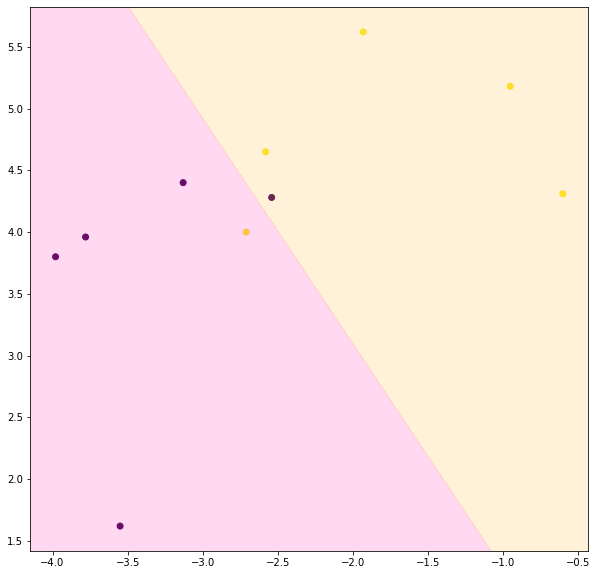

In [146]:
from sklearn.linear_model import LogisticRegression

X = np.array([[-3.78,3.96],[-3.98,3.8],[-0.95,5.18],[-2.71,4],[-0.6,4.31],[-2.58,4.65],[-2.54,4.28],[-3.55,1.62],[-3.13,4.4],[-1.93,5.62]])
y = np.array([-1, -1, 1, 1, 1, 1, -1, -1, -1, 1])

lr = LogisticRegression()
lr.fit(X, y)

lr_contour(X, y, lr)


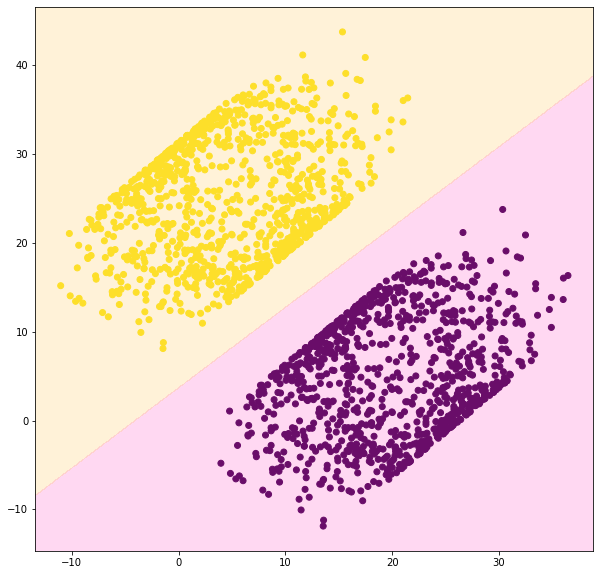

In [147]:
a_df = pd.read_csv('./Vježbe 03/Podaci/A.csv')
X_a = a_df[['x1', 'x2']].to_numpy()
y_a = a_df['y'].to_numpy()
lr_a = LogisticRegression().fit(X_a, y_a)
lr_contour(X_a, y_a, lr_a)

## Linearna regresija - klasifikacijski problem
Neka su zadani podaci (u obliku matrice dizajna) $X\in \mathbb{R}^{m \times n}$ i njihove pripadne klase $y\in \{-1,1\}^m$. Pokušajmo riješiti problem učenjem modela linearne regresije.

Tražimo parametre $\Theta \in \mathbb{R}^n, \theta_0 \in \mathbb{R}$ takve da minimiziraju funkciju cilja 
$$
J(\Theta, \theta_0) = \sum\limits_{i=1}^m (h_{\Theta, \theta_0}(x^{(i)}) - y^{(i)})^2,$$
gdje je $h_{\Theta, \theta_0}(x) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n$. 

Vrijednost model-funkcije koristimo za interpretaciju pripadnosti klase:
 - ako je $h_{\Theta, \theta_0}(x) > 0$, onda je $y = 1$,
 - ako je $h_{\Theta, \theta_0}(x) < 0$, onda je $y = -1$.

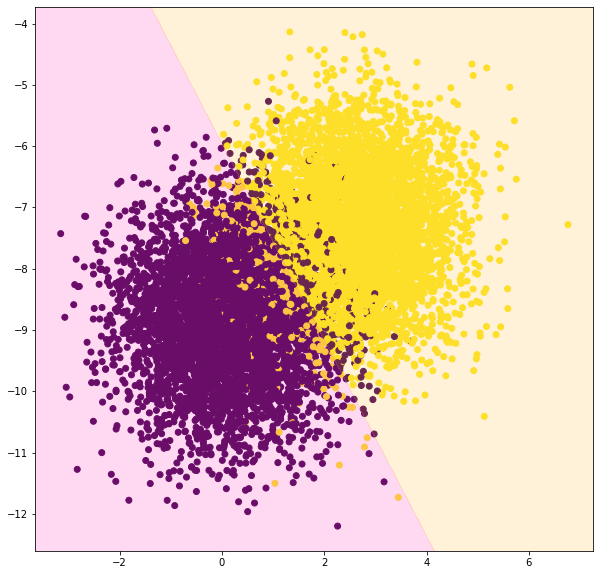

In [153]:
X, y = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=125)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)
y_train[y_train==0]=-1
y_test[y_test==0]=-1

lr = LinearRegression().fit(X_train, y_train)
log = LogisticRegression().fit(X_train, y_train)
#rdg = RidgeClassifier().fit(X_train, y_train)

lr_contour(X, y, lr)

In [150]:
y_pred = lr.predict(X_test)
y_pred[y_pred > 0] = 1
y_pred[y_pred < 0] = -1
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy modela linearne regresije = {accuracy}')

Accuracy modela linearne regresije = 0.9195


In [151]:
y_pred = log.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'Accuracy modela logističke regresije = {accuracy}')

Accuracy modela logističke regresije = 0.9195


## MATRICA ZABUNE
Pretpostavimo da je zadan problem određivanja zdravlja pacijenta na temelju nekakvih nalaza. Očito je da bolesne pacijente želimo zadržati na liječenju, a zdrave otpustiti. Postoje sljedeće četiri mogućnosti:
 - zdravom pacijentu (oznaka 0) smo predvidjeli da je zdrav (oznaka 0)
 - zdravom pacijentu (oznaka 0) smo predvidjeli da je bolestan (oznaka 1) - **greška 1. vrste**
 - bolesnom pacijentu (oznaka 1) smo predvidjeli da je bolestan (oznaka 1)
 - bolesnom pacijentu (oznaka 1) smo predvidjeli da je zdrav (oznaka 0) - **greška 2. vrste**

Ovisno o vrsti greške koju model napravi, moguće je da zdravog pacijenta zadržimo na dodatnom liječenju (što je donekle u redu), ili da bolesnog pacijenta otpustimo (što nikako nije u redu).

Ako želimo osigurati da bolesni pacijenti budu zadržani na liječenju, možemo konstruirati model koji će uvijek vraćati oznaku 1. Međutim, tada i sve zdrave pacijente zadržavamo. 

Za bolju evaluaciju rezultata uvodimo nove oznake i metrike. Pretpostavimo da se skup na kojem evaluiramo model sastoji od $m$ elemenata.
 - TP (true positive) $= |\{i : h(x^{(i)}) = y^{(i)} = 1\}|$, broj bolesnih pacijenata koje smo točno klasificirali
 - FP (false positive) $= |\{i : h(x^{(i)}) = 1, y^{(i)} = 0\}|$, broj zdravih pacijenata koje smo klasificirali kao bolesne
 - TN (true negative) $= |\{i : h(x^{(i)}) = y^{(i)} = 0\}|$, broj zdravih pacijenata koje smo točno klasificirali
 - FN (false negative) $= |\{i : h(x^{(i)}) = 0, y^{(i)} = 1\}|$, broj bolesnih pacijenata koje smo klasificirali kao zdrave
 
Definiramo metrike **precision** i **recall** kao
$$
\textrm{Precision} = \frac{TP}{TP + FP} \\
\textrm{Recall} = \frac{TP}{TP + FN}
$$

Rezultate možemo zapisati u tzv. **matricu zabune**, tablicu frekvencija gdje je svaki element frekvencija jedne od izračunatih klasa.

\begin{bmatrix}
TP (0=>0) & FP (0=>1) \\
TN (1=>1) & FN (1=>0) \\
\end{bmatrix},

U [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) se nalazi funkcija koja računa matricu zabune.

Matrica zabune se također može generalizirati na problem klasifikacije s više klasa.





In [155]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
y_pred = [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
confusion_matrix(y_true, y_pred)

array([[5, 3],
       [2, 2]], dtype=int64)

### Zadatak 
Konstruirajte umjetan skup podataka koji nije linearno separabilan, podijelite ga na skup za treniranje i testiranje, naučite SVM model i ispišite matricu zabune na skupu za testiranje.

[[4 2]
 [2 7]]


C:\Users\tjura\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


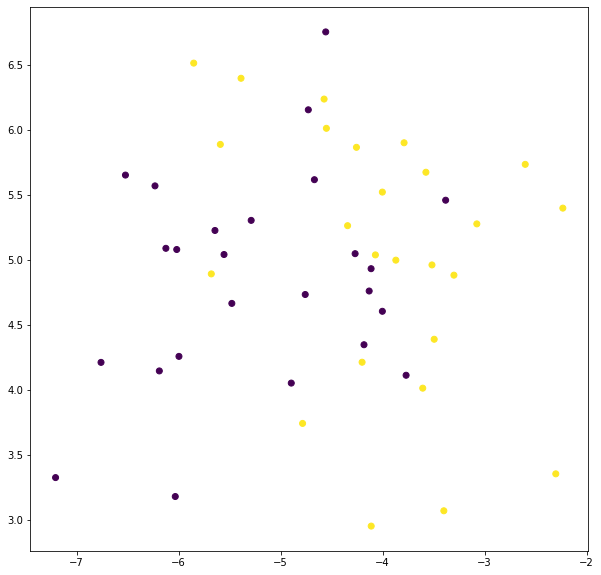

In [174]:
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=50, n_features=2, centers=[(-5,5), (-4,5)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = LinearSVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

#xx = np.linspace(np.min(X)-1, np.max(X)+1)
#yy = -(clf.coef_[0][0]/clf.coef_[0][1])*xx -(clf.intercept_[0]/clf.coef_[0][1])

plt.scatter(X[:,0], X[:,1], c=y)
#plt.plot(xx,yy, c='r')


# KLASIFIKACIJA SA VIŠE KLASA



### OvR
Za svaku od $k$ klasa konstruiramo binarni klasifikator, od kojih $i$-ti određuje je li dana klasa $i$ ili različita od $i$.

Kao rezultat uzimamo onu klasu kojoj je pridružena najveća vjerojatnost (ili nekakav drugi skor).

### OvO
Drugi način klasifikacije je treniranje $\frac{k(k-1)}{2}$ modela od kojih svaki računa skorove za $i$-tu, odnosno $j$-tu klasu.

 - svakom od modela pridružujemo oznaku $\textrm{model}_{ij}$, gdje je $0 \leq i < j < k$
 - $\textrm{model}_{ij}$ radi binarnu klasifikaciju nad podacima iz klasa $i$ i $j$ te se trenira na podskupu skupa za treniranje s oznakama $i$ i $j$, tj. na skupu $S_{ij} = \{(x^{(l)}, y^{(l)}) : y^{(l)} = i \lor y^{(l)} = j\} \subseteq S$, gdje je $S$ skup za treniranje.
 - odluka o klasifikaciji točke se donosi donošenjem odluke za svaki od $\frac{k(k-1)}{2}$ modela te se odabire ona klasa $i$ čija frekvencija klasifikacije je najveća
 - drugim riječima, ako je $f_i$ broj modela koju su danu točku klasificirali klasom $i$, onda je izlaz OvO modela $\textrm{argmax}{}_{i=0,\dots,k-1}f_i$, što je klasa $i$ s najvećom pripadnom vrijednosti $f_i$

Možete naslutiti da je treniranje OvO sporije od OvR jer je potrebno naučiti $O(k^2)$ različitih modela. Ipak, za učenje modela $i,j$ koristi se podskup skupa za treniranje gdje su svi podaci klase $i$ ili $j$, što donekle ubrzava učenje.

## Ugrađena višeklasna klasifikacija
U ugrađenom SVM solveru su dostupne OvO i OvR strategije.

U modelu logističke regresije dostupni su OvO i multinomna strategija.

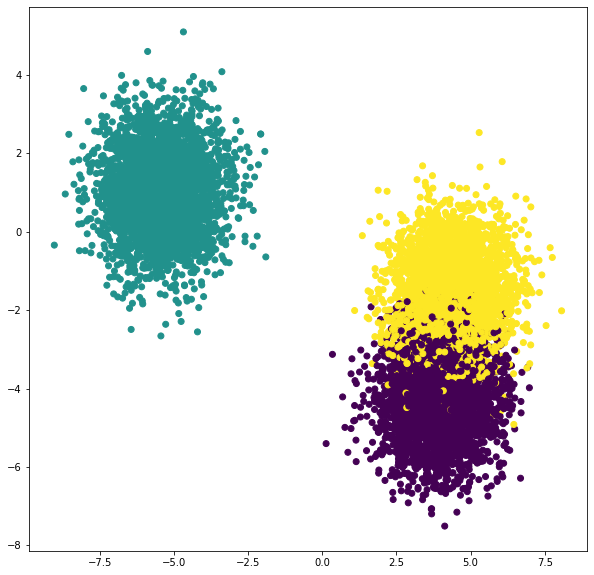

In [10]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#plt.rcParams["figure.figsize"] = (10, 10)

X, y = make_blobs(n_samples=10000, n_features=2, centers=3, random_state=123)
plt.scatter(X[:,0], X[:,1], c=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = SVC().fit(X_train, y_train)
np.sum(y_test == clf.predict(X_test))/len(y_test)


0.9496666666666667

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
np.sum(y_test == clf.predict(X_test)) / len(y_test)

0.9446666666666667

# REGULARIZACIJA


Ako model ima dovoljan broj parametara, nakon treniranja je moguća pojava **overfitanja**, gdje model izvrsno opisuje skup za treniranje, ali nema kvalitetnu generalizaciju, odnosno loše opisuje nove, neviđene podatke.

Jedna metoda sprječavanja overfitanja je dodavanje regularizacijskog izraza funkciji cilja:
$$ 
J(\Theta) = J_{\textrm{old}}(\Theta) + \lambda \cdot R(\Theta),
$$

gdje je $J_{\textrm{old}}$ funkcija cilja koju smo ranije promatrali, $R(\Theta)$ je regularizacijska funkcija, a $\lambda$ je regularizacijski koeficijent koji kontrolira utjecaj regularizacijske funkcije $R(\Theta)$.

## Polinomna regresija s regularizacijom (nije ugrađena)

Jednostavni regularizacijski izraz s kojim smo se upoznali je $R(\Theta) = \frac{1}{2}||\Theta||^2 = \frac{1}{2}\Theta^T\Theta$.

U problemu linearne regresije funkcija cilja je prosječno kvadratno odstupanje te izraz s regularizacijom poprima oblik
$$ 
\frac{1}{2}\sum\limits_{i=1}^m (h_{\Theta}(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2}\Theta^T\Theta.
$$

Ovakav regularizacijski izraz je u literaturi poznat kao *weight decay*, jer tijekom učenja u nekim iterativnim algoritmima "*potiče*" približavanje parametara prema nuli, osim ako podaci ne zahtjevaju drugačije. <br>

---
Zadatak je sljedeći:
- Učitajte podatke 'poly_x.csv' i 'poly_y.csv' i grafički ih prikažite. 
- Podatke modeliramo funkcijom $h_{\Theta, \theta_0}(x) = \theta_0 + \Theta_1 x + \Theta_2 x^2 + \Theta_3 x^3 + \Theta_4 x^4 + \Theta_5 x^5$. 
- Problem polinomne regresije svodimo na proglem višestruke linearne regresije uvođenjem novih varijabli x_i čija vrijednost će biti x^i. Kreirajte pripadnu matricu dizajna. 
- Pokrenite gradijentnu metodu s regularizacijom na vašim podacima, pri tome:
    - postavite regularizacijski koeficijent na $\lambda = 0, 1, 5, 20, 100$
    - Izračunajte srednje kvadratno odstupanje na skupu za treniranje
    - Prikažite graf funkcije $h_{\Theta, \theta_0}$
    
Što možete zaključiti na temelju različitih izbora $\lambda$? Čemu odgovara slučaj $\lambda = 0$? 

Napomena: prilikom treniranja ta tri slučaja, fiksirajte broj iteracija i stopu učenja $\alpha$.

In [41]:
from sklearn.metrics import mean_squared_error

def gradient_method(X, y, lmbd, lr=0.1, num_iter=50000):
    print(f'Starting gradient descent with learning rate {lr}, regularization parameter {lmbd} and {num_iter} iterations')
    m, n = X.shape
    theta = np.zeros(X.shape[1]).reshape(-1, 1)
    loss = np.empty(num_iter)
    for it in range(num_iter):
        loss[it] = (0.5 / m) * np.sum(np.square(X @ theta - y))
        grad = (1.0 / m) * ((X @ theta - y).T @ X).reshape(-1, 1)
        theta[0] = theta[0] - lr * grad[0]
        theta[1:] = theta[1:] *  (1 - lr * lmbd / m) - lr * grad[1:]
    return theta, loss

def plot_regression(X, y, theta, s):
    # X, y podaci
    # theta parametar modela
    # s stupanj polinoma u model funkciji h_theta
    plt.scatter(X, y)
    xx = np.linspace(np.min(X), np.max(X), 1000)
    XX = np.ones([xx.shape[0],s+1])
    for i in range(s):
        XX[:,i+1] = xx**(i+1)
    yy = np.dot(XX, theta)
    plt.plot(xx, yy, 'r')
    plt.show()

Starting gradient descent with learning rate 0.1, regularization parameter 0 and 50000 iterations
lambda = 0
greska = 3.647896284217492e-05
theta  = [ 0.49742526  0.25666514 -1.96425355 -2.34571252  3.9174945  -0.52722958]


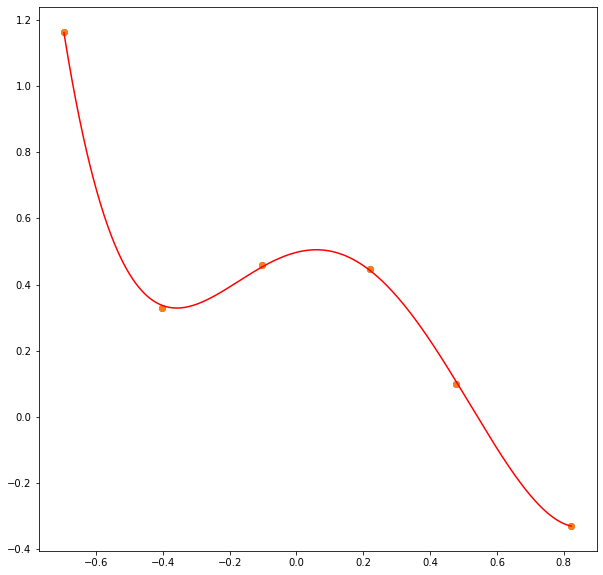

Starting gradient descent with learning rate 0.1, regularization parameter 1 and 50000 iterations
lambda = 1
greska = 0.0486379837968924
theta  = [ 0.4027743  -0.37576298 -0.00700627 -0.24832787 -0.01661063 -0.14666832]


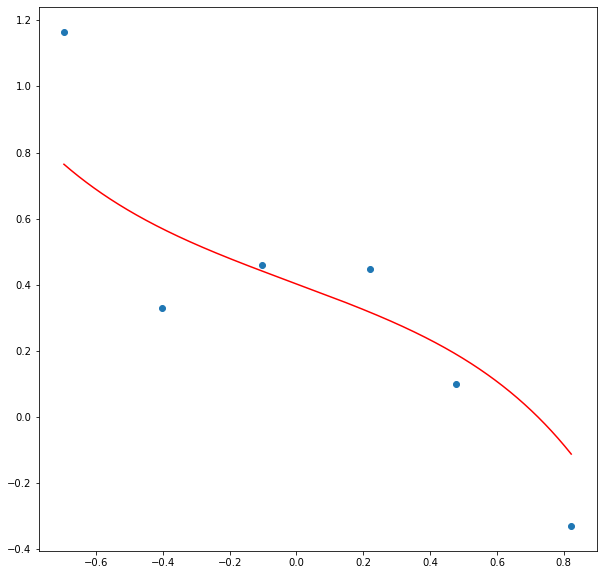

Starting gradient descent with learning rate 0.1, regularization parameter 5 and 50000 iterations
lambda = 5
greska = 0.11548537515262436
theta  = [ 0.38392971 -0.17063727 -0.01524403 -0.09793197 -0.01681055 -0.0572367 ]


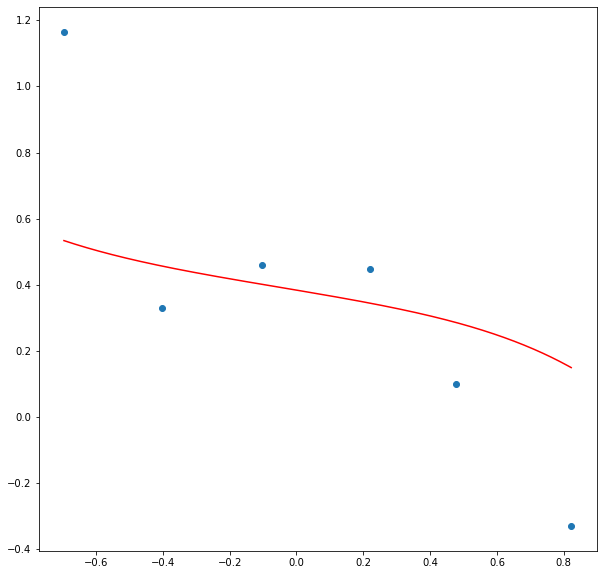

Starting gradient descent with learning rate 0.1, regularization parameter 20 and 50000 iterations
lambda = 20
greska = 0.1704256849539361
theta  = [ 0.36942486 -0.05540128 -0.00591673 -0.03093211 -0.0061645  -0.01805393]


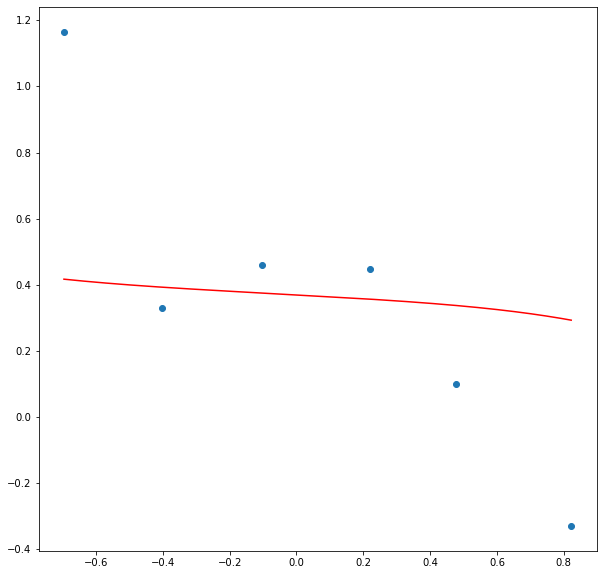

Starting gradient descent with learning rate 0.1, regularization parameter 100 and 50000 iterations
lambda = 100
greska = 0.19450253858347322
theta  = [ 0.36364664 -0.01203305 -0.00134509 -0.00666904 -0.00138234 -0.00389134]


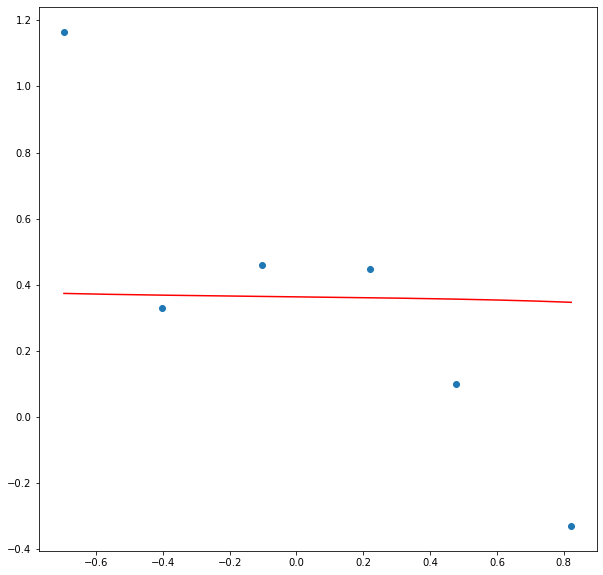

In [42]:
X = pd.read_csv('./Vježbe 06/Podaci/poly_x.csv').to_numpy().reshape(-1,)    # zbog mnozenja kasnije smo reshapeali
y = pd.read_csv('./Vježbe 06/Podaci/poly_y.csv').to_numpy()

plt.scatter(X,y)

# Matrica dizajna
X_new = np.ones((X.shape[0], 6)) #X.shape = (6,1)
for i in range (1,6):   # prvi stupac ostaju jedinice
    X_new[:,i] = X**i

lambdas = np.array([0, 1, 5, 20, 100])
for lmbd in lambdas:
    theta, cost = gradient_method(X_new, y, lmbd)

    print(f'lambda = {lmbd}',)
    print(f'greska = {mean_squared_error(y, np.dot(X_new, theta))}')    # srednje kvadratno odstupanje
    print(f'theta  = {theta.squeeze()}')
    plot_regression(X, y, theta, 5)


## Logistička regresija s regularizacijom (nije ugrađena)

Regularizirana funkcija cilja u slučaju logističke regresije ima oblik
$$ 
J(\Theta, \theta_0) = \frac{1}{m}\sum\limits_{i=1}^{m}\left[-y^{(i)}\log{(h_{\Theta, \theta_0}(x^{(i)}))}-(1-y^{(i)})\log{(1-h_{\Theta, \theta_0}(x^{(i)}))}\right] + \frac{\lambda}{2m}||\Theta||^2.
$$

Zadatak je sljedeći
- Učitajte i prikažite podatke iz datoteka 'logi_x.csv' i ' logi_y.csv'. 
- Podatke separiramo u dvije klase. Kao model funkciju koristit ćemo polinom stupnja 6. Kako ulazni podaci imaju dvije varijable, $x_1$ i $x_2$, to će biti polinom $6$-og stupnja koji sadrži sve monome od $x_1$ i $x_2$, dakle  $h_{\Theta, \theta_0}(x) = \theta_0 + \Theta_1 x_1 + \Theta_2 x_2 + \Theta_3 x_1^2 + \Theta_4 x_2^2 + \Theta_5 x_1 x_2 + \cdots + \Theta_{26} x_1 x_2^5 + \Theta_{27} x_2^6$. 
- Pomoću klase sklearn.preprocessing.PolynomialFeatures napravite odgovarajuću matricu dizajna za vaše podatke
- Koristeći implementiranu gradijentnu metodu natrenirajte vaše podatke, kao i u prethodnim zadacima napravite nekoliko slučajeva za $\lambda = 0, 1, 10, 100$. 
- Prikažite podatke i pomoću funkcije $\textrm{plot_boundary}$ prikažite izračunatu granicu. 

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score

def plot_boundary(X, y, theta, poly_featurizer):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 1000),
                         np.linspace(ylim[0], ylim[1], 1000))
    
    transformed = poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = (np.sign(np.dot(transformed, theta)) + 1) / 2
    
    # Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.show()

def gradient_method_logreg(X, y, lmbd, lr=0.1, num_iter=50000): 
    m = X.shape[0]
    n = X.shape[1]
    theta =  np.zeros((n,1))
    loss = []
    j=0
    for it in range(num_iter):     
        loss.append(loss_fn(X, y, theta, lmbd))   
        grad = (1 / m) * ((X.T) @ (sigma(X @ theta) - y))
        theta[0] = theta[0] - lr * grad[0]
        theta[1:] = theta[1:] * (1 - lr * (lmbd / m)) - lr * grad[1:]
                    
    return theta, loss

In [48]:
def sigma(z):
    return (1.0 / (1.0 + np.exp(-z)))

# model funkcija h
def predict(X, theta):
    pred = sigma(np.dot(X, theta))
    return np.array([1 if p >= 0.5 else 0 for p in pred])

# regularizirana funkcija cilja / kriterijska funkcija
def loss_fn(X, y, theta, lmbd):
    m = X.shape[0]
    h = sigma(X @ theta)
    return -(1 / m) * np.sum((y * np.log(h) + (1 - y) * np.log(1 - h))) + (lmbd / (2 * m)) * np.inner(theta[1:], theta[1:])




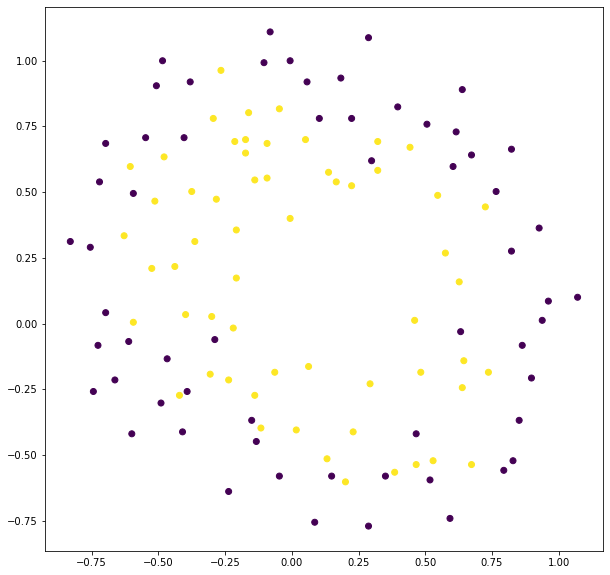

In [50]:
X = pd.read_csv('./Vježbe 06/Podaci/logi_x.csv').to_numpy()
y = pd.read_csv('./Vježbe 06/Podaci/logi_y.csv').to_numpy()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

lambda   = 0
accuracy = 0.8389830508474576
theta    = [ 4.0300233   2.45881243  4.80161276 -5.48062137 -6.52911017 -7.38668822
  1.80726799 -1.12192896  1.38934248 -1.97964149 -4.89443261  2.68628992
 -3.41280716 -2.65465792 -4.75618564 -1.41221578 -0.43641535  3.2840328
 -3.06879735 -2.9225416   1.7010073  -5.08805214  1.38671852 -1.11344707
  1.82784627 -3.03689778 -2.9355217   0.17071732]


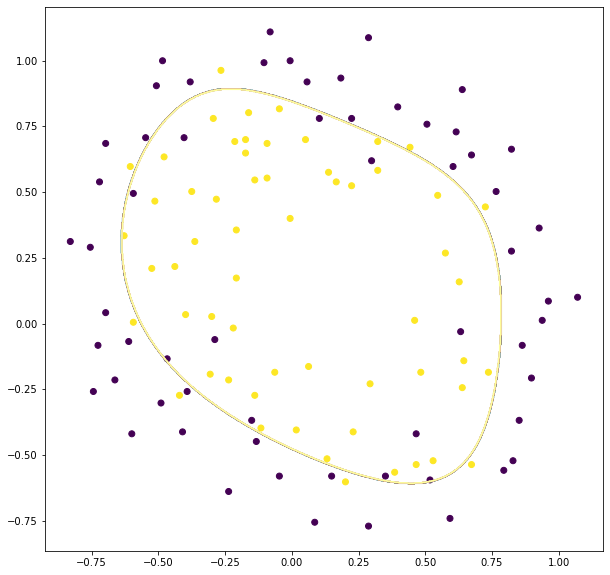

lambda   = 1
accuracy = 0.8305084745762712
theta    = [ 1.27273951  0.6252718   1.18108869 -2.01996086 -0.91742375 -1.43166444
  0.12400635 -0.36553437 -0.35723962 -0.17513048 -1.45815646 -0.05098906
 -0.61555504 -0.27470631 -1.19281652 -0.24218823 -0.20600609 -0.04473075
 -0.2777845  -0.2953781  -0.45635749 -1.04320249  0.02777171 -0.29243131
  0.01556681 -0.32737959 -0.14388693 -0.92465257]


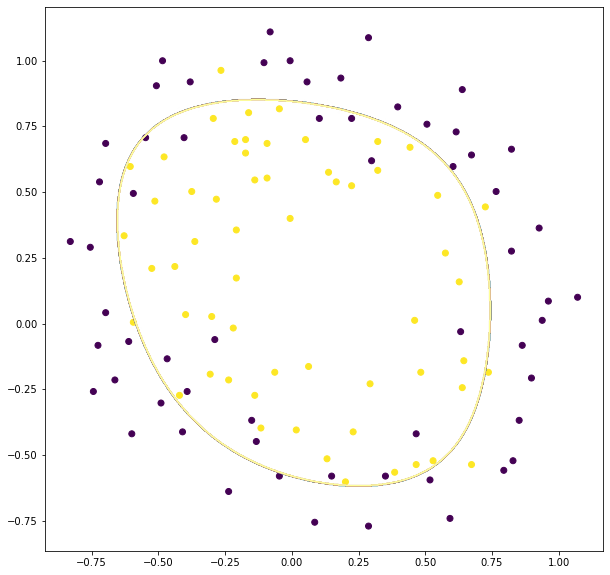

lambda   = 10
accuracy = 0.7457627118644068
theta    = [ 0.32617789 -0.00815028  0.1657974  -0.44671852 -0.11177305 -0.2789162
 -0.07145281 -0.05789003 -0.06509883 -0.1063696  -0.33672919 -0.01297379
 -0.11670694 -0.02809802 -0.28602599 -0.1161486  -0.03704601 -0.02242245
 -0.04886562 -0.04163133 -0.18675647 -0.25333941 -0.00291261 -0.05796667
 -0.00052916 -0.06352867 -0.01206586 -0.27148704]


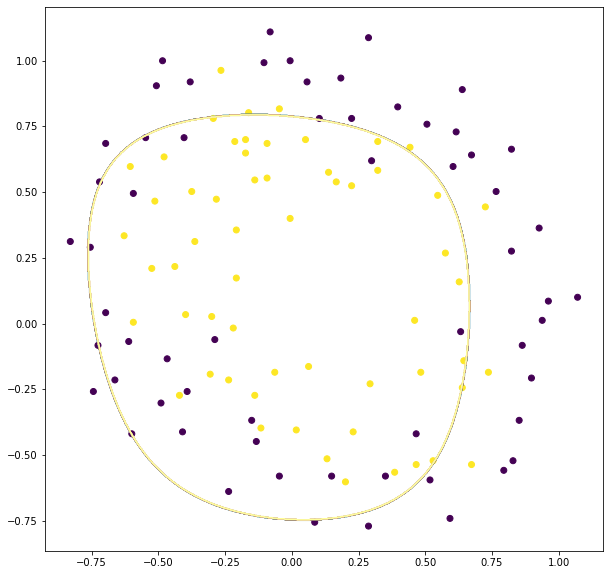

lambda   = 100
accuracy = 0.6101694915254238
theta    = [ 0.02187771 -0.01748172  0.00571079 -0.05516895 -0.01314877 -0.03859858
 -0.01846356 -0.00773219 -0.00892429 -0.02280452 -0.04343846 -0.00235623
 -0.01415612 -0.00349508 -0.04143588 -0.02100593 -0.00471917 -0.00359131
 -0.00632226 -0.00502441 -0.03197676 -0.03416335 -0.00107629 -0.00702615
 -0.00038506 -0.0079823  -0.00154779 -0.04108677]


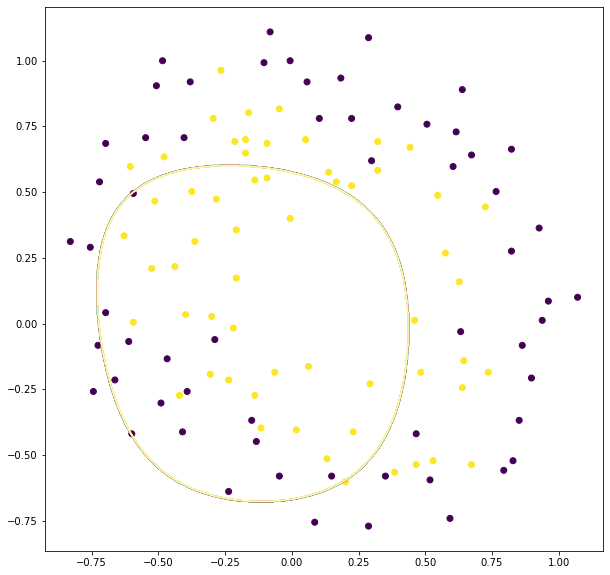

In [55]:
# Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
# For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
#print(X_poly)
X_poly.shape

lambdas = np.array([0, 1, 10, 100])
for lmbd in lambdas:
    theta, cost = gradient_method_logreg(X_poly, y, lmbd)
    y_pred = predict(X_poly, theta)
    
    print(f'lambda   = {lmbd}',)
    print(f'accuracy = {accuracy_score(y, y_pred)}')
    print(f'theta    = {theta.squeeze()}')
    plot_boundary(X, y, theta, poly)

## Ugrađena regularizacija u SVM
Prilikom rješavanja SVM-a rješavali smo problem uvjetne optimizacije
$$
\textrm{argmin}_{\Theta, \theta_0, \xi}\frac{1}{2}||\Theta||^2 + C\sum\limits_{i=1}^m \xi_i
$$
uz uvjet
$$
\text{  uz uvjet  } y^{(i)}(\Theta^T x^{(i)} + \theta_0) \geq 1 - \xi_i \textrm{ i } \xi_i \geq 0, \text{ }  i = 1, 2, \dots, m,
$$

Cilj SVM-a je bio maksimizirati geometrijsku marginu, pa u tom kontekstu $\frac{1}{2}||\Theta||^2$ ne promatramo kao regularizacijski parametar, nego *glavni* izraz koji minimiziramo, dok $C\sum\limits_{i=1}^m \xi_i$ igra ulogu regularizacije. Hiperparametar $C$ u ovom slučaju interpretiramo kao koeficijent regularizacije, dok je "snaga" regularizacije obrnuto proporcionalna njegovoj vrijednosti.

S druge strane, u sličnom (istom do na koeficijente) problemu smo rješavali problem bezuvjetne optimizacije
$$
\textrm{argmin}_{\Theta, \theta_0}\lambda||\Theta||^2 + \frac{1}{m}\sum\limits_{i=1}^m\ell_{hinge}(y^{(i)}(\Theta^T x^{(i)} + \theta_0)).
$$
U ovom slučaju $\lambda||\Theta||^2$ interpretiramo kao regularizacijski izraz, dok je glavni cilj optimizacije minimizirati prosječan hinge gubitak.

Zadatak je natrenirati SVM model s različitim regularizacijskim koeficijentima $C$.

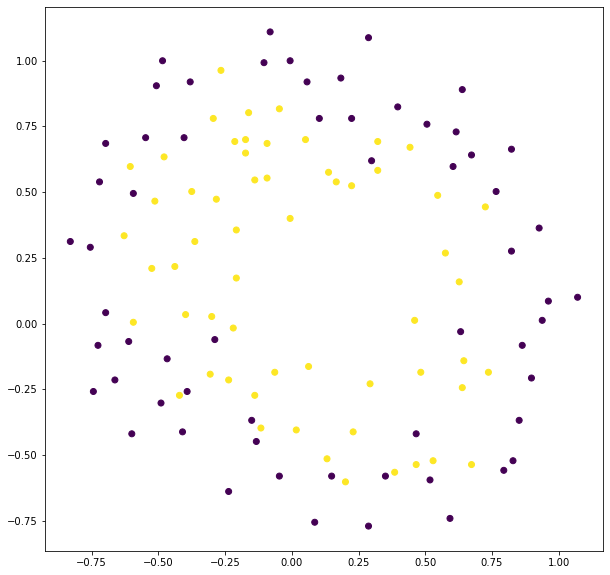

In [57]:
X = pd.read_csv('./Vježbe 06/Podaci/logi_x.csv').to_numpy()
y = pd.read_csv('./Vježbe 06/Podaci/logi_y.csv').to_numpy()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [60]:
# SQUEEZE
# [[[2, 2, 2],[2, 2, 2]]], shape (1, 2, 3)
# [[2, 2, 2],[2, 2, 2]], shape (2,3)

C = np.array([0.01, 0.1, 0.5, 1, 2, 5, 10, 100])
for c in C:
    clf = SVC(kernel='rbf', C=c).fit(X, y.squeeze())
    y_pred = clf.predict(X)
    print(f'C        = {c}',)
    print(f'accuracy = {accuracy_score(y, y_pred)}')

C        = 0.01
accuracy = 0.5084745762711864
C        = 0.1
accuracy = 0.711864406779661
C        = 0.5
accuracy = 0.788135593220339
C        = 1.0
accuracy = 0.847457627118644
C        = 2.0
accuracy = 0.8559322033898306
C        = 5.0
accuracy = 0.847457627118644
C        = 10.0
accuracy = 0.847457627118644
C        = 100.0
accuracy = 0.864406779661017
